In [11]:
import cv2
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mping

In [12]:
blue_tri = cv2.imread('images/ho_blue_tri.png')[:,:,::-1]
blue_sq = cv2.imread('images/blue_sq.png')[:,:,::-1]
red_sq = cv2.imread('images/red_sq.png')[:,:,::-1]
red_tri = cv2.imread('images/ho_red_tri.png')[:,:,::-1]

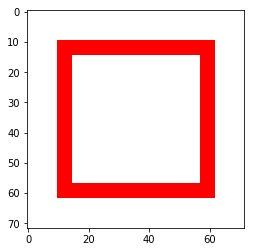

In [13]:
plt.imshow(red_sq)

In [14]:
def trans(a):
    return .299*a[:,:,0] + .402*a[:,:,1] + .299*a[:,:,2]

In [15]:
def give_non_zero(mat):
    co = []
    for i in range(72):
        for j in range(72):
            if mat[i,j] > 0:
                co.append([i,j])
    return co

In [16]:
def detect_sq(image):
    g_kernel = cv2.getGaborKernel((8,8), 4.0, 0, 5, 0, 0)
    g_ = cv2.getGaborKernel((8,8), 4.0,np.pi/2 , 5, 0, 0)
    mj = cv2.filter2D(image,0, g_kernel)  * cv2.filter2D(image,0, g_)
    corner = give_non_zero(mj)
    return corner

In [17]:
def detect_tri(image):
    corners = []
    #================detect top corner====================
    h_ = cv2.getGaborKernel((9,9), 6.1,5*np.pi/6 , 8.9, 0, 0)
    g_ = cv2.getGaborKernel((9,9), 6.1,1*np.pi/6 , 8.9, 0, 0)

    mj =  (cv2.bitwise_not(cv2.filter2D(image, 0, h_)) * cv2.bitwise_not(cv2.filter2D(image, 0, g_)) )
    mj = mj.astype('uint8')
    top_corner = give_non_zero(mj)
    
    if len(top_corner) ==2:
        top_corner = top_corner[1]
    if len(top_corner) > 2:
        top_corner = []
    
    #==============detect side corners1===================
    
    i_ = cv2.getGaborKernel((9,9), 6,1*np.pi/2 , 7.1, 0, 0)
    g_ = cv2.getGaborKernel((9,9), 6.1,1*np.pi/6 , 8.9, 0, 0)

    mj =  (((cv2.filter2D(image, 0, i_)))* cv2.bitwise_not(cv2.filter2D(image, 0, g_))) /2
    mj = mj.astype('uint8')
    side_corner1 = give_non_zero(mj)
    
    if len(side_corner1) == 1:
        side_corner1 = side_corner1[0]
        
    #==============detect side corner2===================
    
    i_ = cv2.getGaborKernel((9,9), 6,1*np.pi/2 , 7.1, 0, 0)
    g_ = cv2.getGaborKernel((9,9), 6.1,5*np.pi/6 , 8.9, 0, 0)

    mj =  (((cv2.filter2D(image, 0, i_)))* cv2.bitwise_not(cv2.filter2D(image, 0, g_))) /2
    mj = mj.astype('uint8')
    side_corner2 = give_non_zero(mj)
    
    if len(side_corner2) == 1:
        side_corner2 = side_corner2[0]
    
    corner = [top_corner,side_corner1,side_corner2]
    return corner
        

In [18]:
def detect(image):
    im = trans(image)
    im = im.astype('uint8')
    img = cv2.resize(im,(72,72))
    sq_corner = detect_sq(img) 
    tri_corner = detect_tri(img)
    flag = 0
    if len(sq_corner)>0:
        flag = 1
        print('its a square')
    elif len(tri_corner)>0:
        flag = 2
        print('its a triagle')
    else:
        print('empty')
    return flag

In [23]:
mmm = detect(red_tri)

its a triagle


In [24]:
mmm

2